In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import export_text
import mglearn
from dashboard_two import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

### brain volume_____VS_____diagnosischanges from every visit


In [3]:
com_col = ['Phase', 'RID', 'VISCODE2','PTID']
target = 'DIAG_GROUP'

In [4]:
df = pd.read_csv('../data/main_file_final.csv').drop(['NPIKSEV'],axis=1)
df = df[df['DIAG_GROUP'].notna()].reset_index(drop=True)   # keep the rows where DXCHANGE is not nan
df

,RID,DIAG,VISCODE2,PTID,AGE,PTGENDER,PTEDUCAT,Phase,EXAMDATE,Ventricles,...,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,OSA,PREV_DIAG,DIAG_CHANGED,DIAG_GROUP
0,2,NL,sc,011_S_0002,74.3,Male,16.0,ADNI1,2005-08-09,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
1,2,NL,bl,011_S_0002,74.3,Male,16.0,ADNI1,2005-08-09,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
2,2,NL,m06,011_S_0002,74.3,Male,16.0,ADNI1,2006-06-03,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
3,2,NL,m36,011_S_0002,74.3,Male,16.0,ADNI1,2008-08-27,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
4,2,NL,m60,011_S_0002,74.3,Male,16.0,ADNI1,2010-09-22,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22196,7102,NL,sc,341_S_7102,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22197,7103,NL,sc,013_S_7103,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22198,7104,NL,sc,153_S_7104,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22199,7105,MCI,sc,035_S_7105,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,MCI,False,MCI-MCI


In [5]:
df.columns

Index(['RID', 'DIAG', 'VISCODE2', 'PTID', 'AGE', 'PTGENDER', 'PTEDUCAT',
       'Phase', 'EXAMDATE', 'Ventricles', 'Hippocampus', 'WholeBrain',
       'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'Ventricles_bl',
       'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl',
       'MidTemp_bl', 'ICV_bl', 'ABETA', 'TAU', 'PTAU', 'ABETA_bl', 'TAU_bl',
       'PTAU_bl', 'ratio_Ventricles_bl', 'ratio_Hippocampus_bl',
       'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl', 'ratio_Fusiform_bl',
       'ratio_ICV_bl', 'ratio_ABETA_bl', 'ratio_TAU_bl', 'ratio_PTAU_bl',
       'EXAMDATE_bl', 'duration_in_days', 'Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year', 'ABETA_reduction_per_year',
       'TAU_reduction_per_year', 'PTAU_reduction_per_year', 'insomnia',
       'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', '

In [6]:
col_lst = [ target,'Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year']
df1 = df[com_col + col_lst].set_index(com_col).dropna(how='any',axis=0).reset_index()

col_lst_2 = [ target,'ratio_Ventricles_bl', 'ratio_Hippocampus_bl',
       'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl', 'ratio_Fusiform_bl',
       'ratio_ICV_bl']
new_col_name = ['Phase', 'RID', 'VISCODE2', 'PTID','DIAG_GROUP','relative Ventricles volume','relative Hippocampus volume','relative WholeBrain volume',
                'relative Entorhinal volume','relative Fusiform volume','relative ICV volume']
df2 = df[com_col + col_lst_2].set_index(com_col).dropna(how='any',axis=0).reset_index()
df2.columns = new_col_name
col_lst_3 = [ target,'ratio_Ventricles_bl', 'ratio_Hippocampus_bl',
       'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl', 'ratio_Fusiform_bl',
       'ratio_ICV_bl','Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year']
df3 = df[com_col + col_lst_3].set_index(com_col).dropna(how='any',axis=0).reset_index()

# we want to make the model stays simply, therefore we ask the question which is important for the people are involved.
# will it get BETTER or not?
# two groups: MCI-AD or (MCI-MCI, MCI-NL)

label_map_better = { 'MCI-MCI':'MCI-MCIAD','MCI-AD':'MCI-MCIAD','MCI-NL':'MCI-NL','AD-NL':'AD-NLMCI','AD-MCI':'AD-NLMCI','AD-AD':'AD-AD'}
df2_better = df2.copy()
df2_better[target] = df2_better[target].map(label_map_better)

# will it get WORSE or not?
label_map_worse = { 'MCI-NL':'MCI-NLMCI','MCI-MCI':'MCI-NLMCI','MCI-AD':'MCI-AD'}
df2_worse =  df2.copy() 
df2_worse[target] = df2_worse[target].map(label_map_worse)

In [7]:
df2.groupby(target).count()

,Phase,RID,VISCODE2,PTID,relative Ventricles volume,relative Hippocampus volume,relative WholeBrain volume,relative Entorhinal volume,relative Fusiform volume,relative ICV volume
DIAG_GROUP,,,,,,,,,,
AD-AD,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649
AD-MCI,32,32,32,32,32,32,32,32,32,32
AD-NL,2,2,2,2,2,2,2,2,2,2
MCI-AD,215,215,215,215,215,215,215,215,215,215
MCI-MCI,6935,6935,6935,6935,6935,6935,6935,6935,6935,6935
MCI-NL,74,74,74,74,74,74,74,74,74,74
NL-MCI,87,87,87,87,87,87,87,87,87,87
NL-NL,6942,6942,6942,6942,6942,6942,6942,6942,6942,6942


In [8]:
df2.shape

(16936, 11)

In [9]:
np.sum(df2.isna())   # check nan

Phase                          0
RID                            0
VISCODE2                       0
PTID                           0
DIAG_GROUP                     0
relative Ventricles volume     0
relative Hippocampus volume    0
relative WholeBrain volume     0
relative Entorhinal volume     0
relative Fusiform volume       0
relative ICV volume            0
dtype: int64

Text(0, 0.5, 'count')

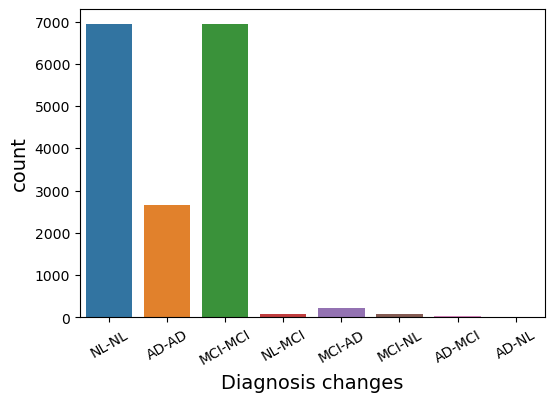

In [10]:
f, axes = plt.subplots(figsize=(6, 4))
sns.countplot(data=df2, x= target)
plt.tick_params(axis='x',labelrotation=30)
plt.xlabel('Diagnosis changes',fontsize=14)
plt.ylabel('count',fontsize=14)

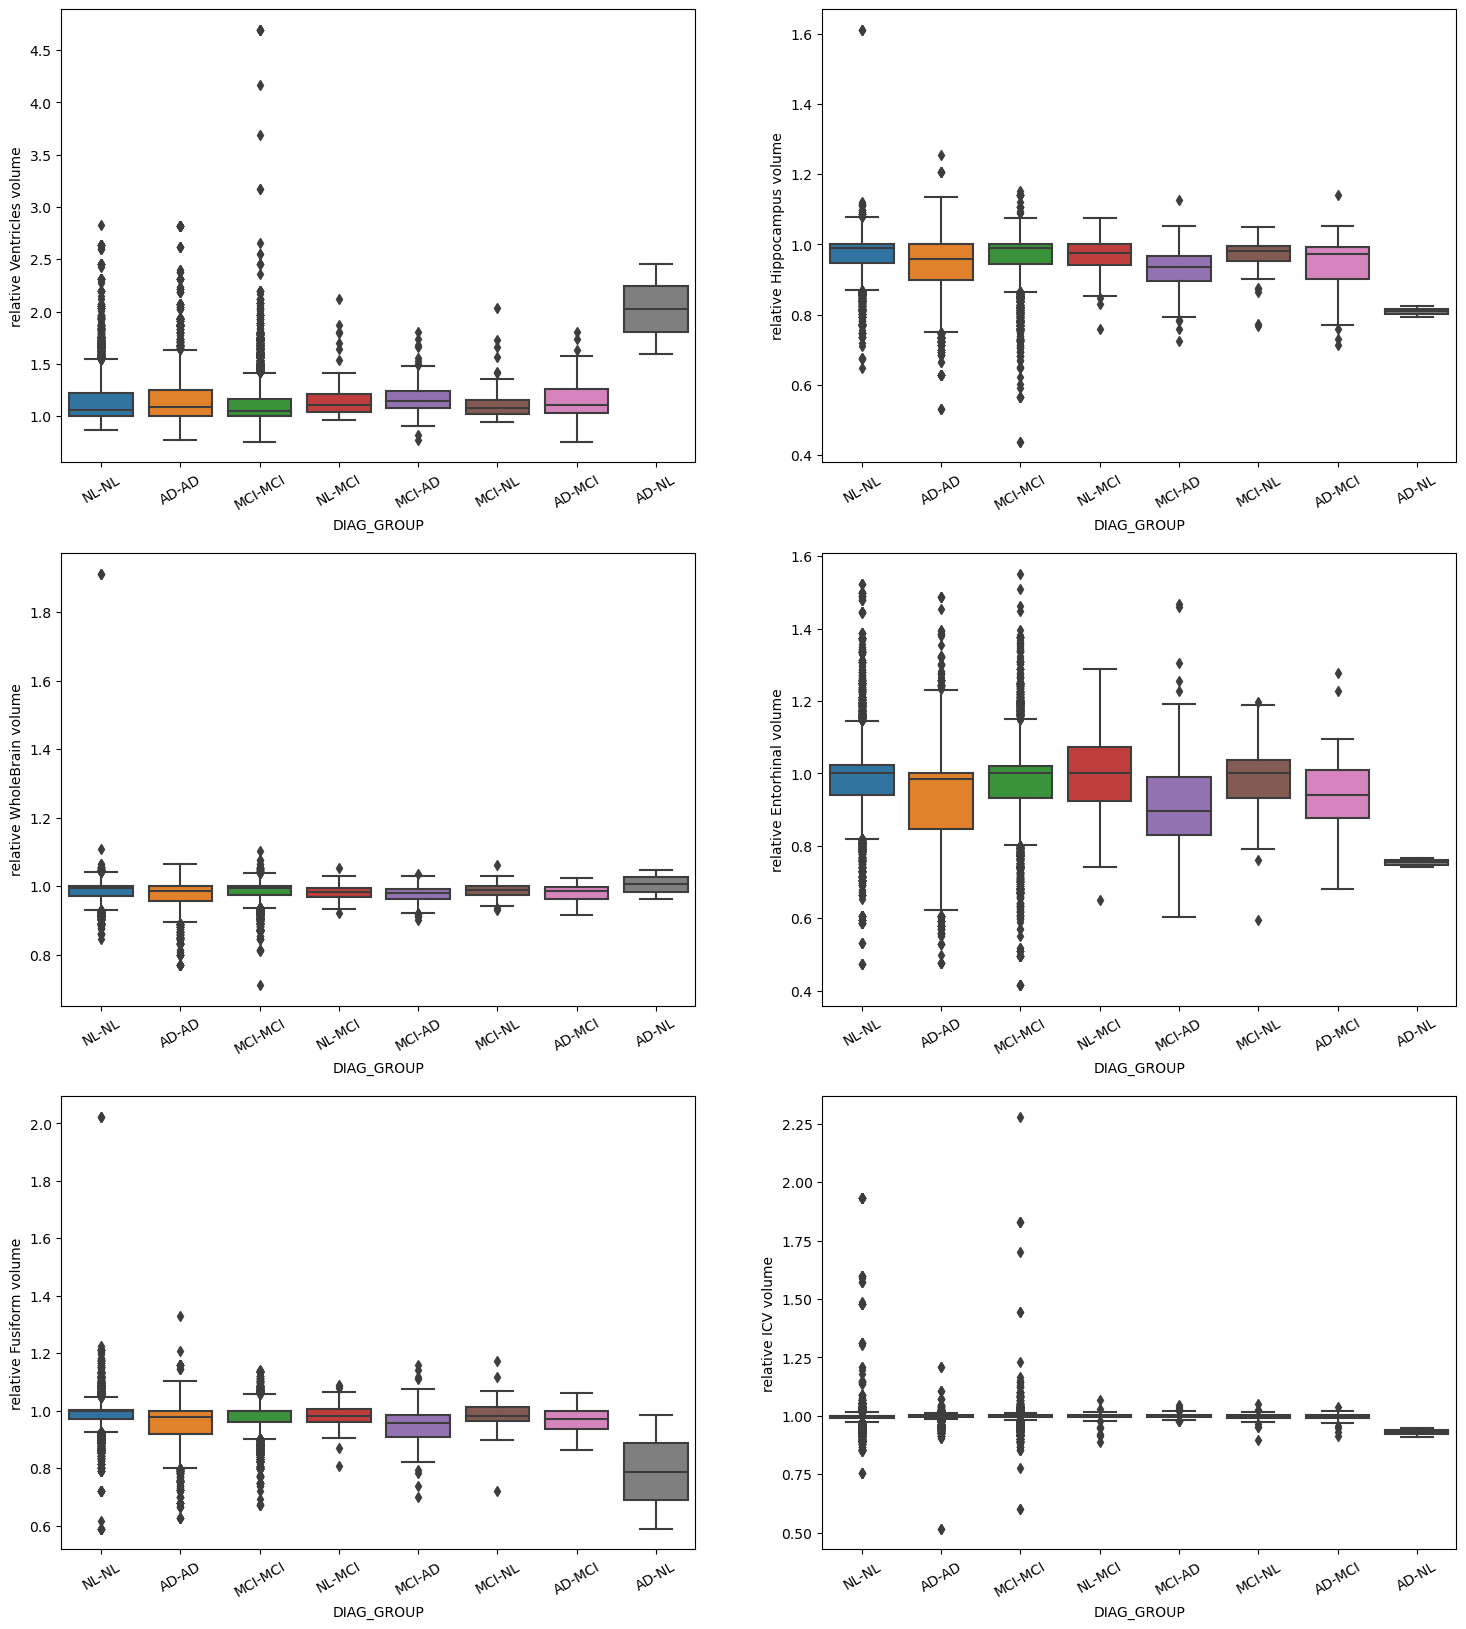

In [11]:
lst = ['relative Ventricles volume','relative Hippocampus volume','relative WholeBrain volume',
                'relative Entorhinal volume','relative Fusiform volume','relative ICV volume']

f,axes = plt.subplots(nrows = len(lst)//2 ,ncols=2,figsize=(18,20))
axes = axes.ravel()
#labels = [1,2,3,4,5,6,7,8]
for i in range(len(lst)):
    ax = sns.boxplot(data=df2, y=lst[i],x= target,ax = axes[i])
for ax in f.axes: # rotate x ticks
    #ax.set_xticks(rotation=45, ha='right')
    #ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.tick_params(axis='x',labelrotation=30)

- AD-NL too little data

- groups:
    - NL-NL, NL-MCI, 
    - MCI-MCI, MCI-NL, MCI-AD
    - AD-AD, AD-(MCI+NL)

In [12]:
df2_better[target].unique()

array([nan, 'AD-AD', 'MCI-MCIAD', 'MCI-NL', 'AD-NLMCI'], dtype=object)

In [13]:
g1 = df2.loc[df2[target].isin(['NL-NL','NL-MCI'])].reset_index(drop=True)
g2 = df2.loc[df2[target].isin(['MCI-NL','MCI-MCI','MCI-AD'])].reset_index(drop=True)
g2_better = df2_better.loc[df2_better[target].isin(['MCI-NL','MCI-MCIAD'])].reset_index(drop=True)
g2_worse = df2_worse.loc[df2_worse[target].isin(['MCI-NLMCI','MCI-AD'])].reset_index(drop=True)
g3 = df2.loc[df2[target].isin(['AD-MCI','AD-AD'])].reset_index(drop=True)
g3_better = df2_better.loc[df2_better[target].isin(['AD-NLMCI','AD-AD'])].reset_index(drop=True) 

- functions
    - cv_models(df,drop_lst,target,k): under sampling, NOT SPLIT, scale, pca, models with cross-validation 
    - models(df,drop_lst,target) : under sampling, split, scale, pca, models   

In [14]:
drop_lst = ['Phase', 'RID', 'VISCODE2', 'PTID',target]
k = 10
lst = ['relative Ventricles volume','relative Hippocampus volume','relative WholeBrain volume',
                'relative Entorhinal volume','relative Fusiform volume','relative ICV volume']

### is a patient with NL keep NL or not?

In [18]:
cv_models(g1,drop_lst,target,k)

After undersampling data size is 174 ; Resampled dataset shape Counter({'NL-MCI': 87, 'NL-NL': 87})

4 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.398
          - saga_L1, average weighted f1-score of 10-cross validation:0.334
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.401
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.392
          - saga_L1, average weighted f1-score of 10-cross validation:0.334
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.392
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.461
          - saga_L1, average weighted f1-score of 10-cross validation:0.334
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.461
       - C = 1
          - lb

          - 25trees. average weighted f1-score of 10-cross validation:0.584
          - 30trees. average weighted f1-score of 10-cross validation:0.574
          - 35trees. average weighted f1-score of 10-cross validation:0.565
          - 40trees. average weighted f1-score of 10-cross validation:0.571
          - 45trees. average weighted f1-score of 10-cross validation:0.573
          - 50trees. average weighted f1-score of 10-cross validation:0.561
          - 55trees. average weighted f1-score of 10-cross validation:0.573
          - 60trees. average weighted f1-score of 10-cross validation:0.596
          - 65trees. average weighted f1-score of 10-cross validation:0.578
          - 70trees. average weighted f1-score of 10-cross validation:0.573
          - 75trees. average weighted f1-score of 10-cross validation:0.566
          - 80trees. average weighted f1-score of 10-cross validation:0.583
          - 85trees. average weighted f1-score of 10-cross validation:0.583
          - 

After undersampling data size is 174 ; Resampled dataset shape Counter({'NL-MCI': 87, 'NL-NL': 87})

4 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


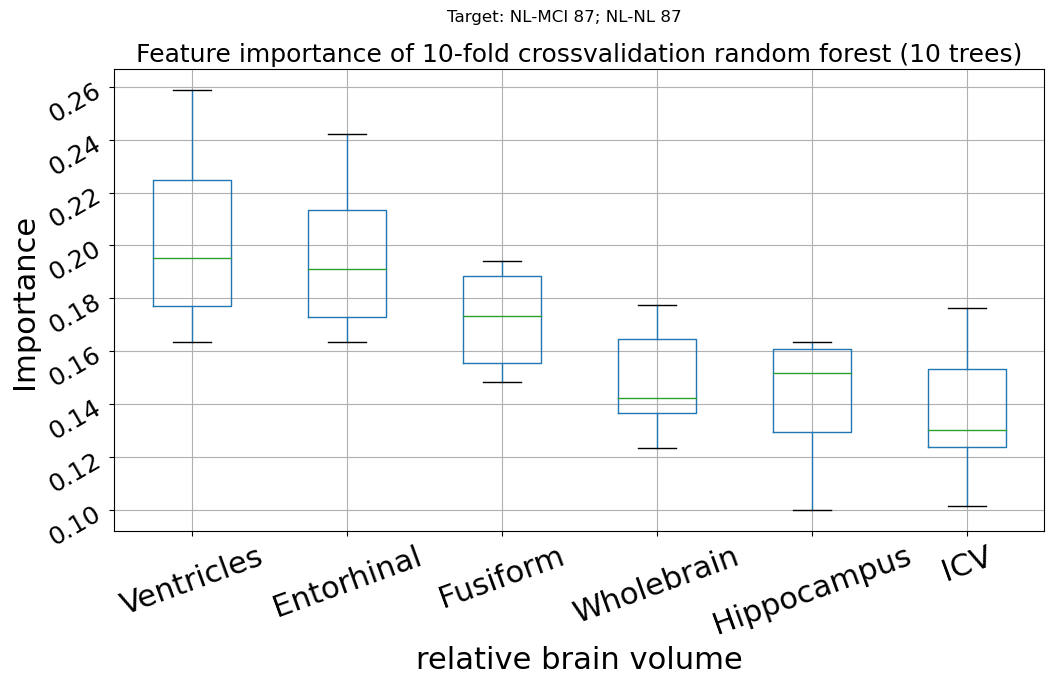

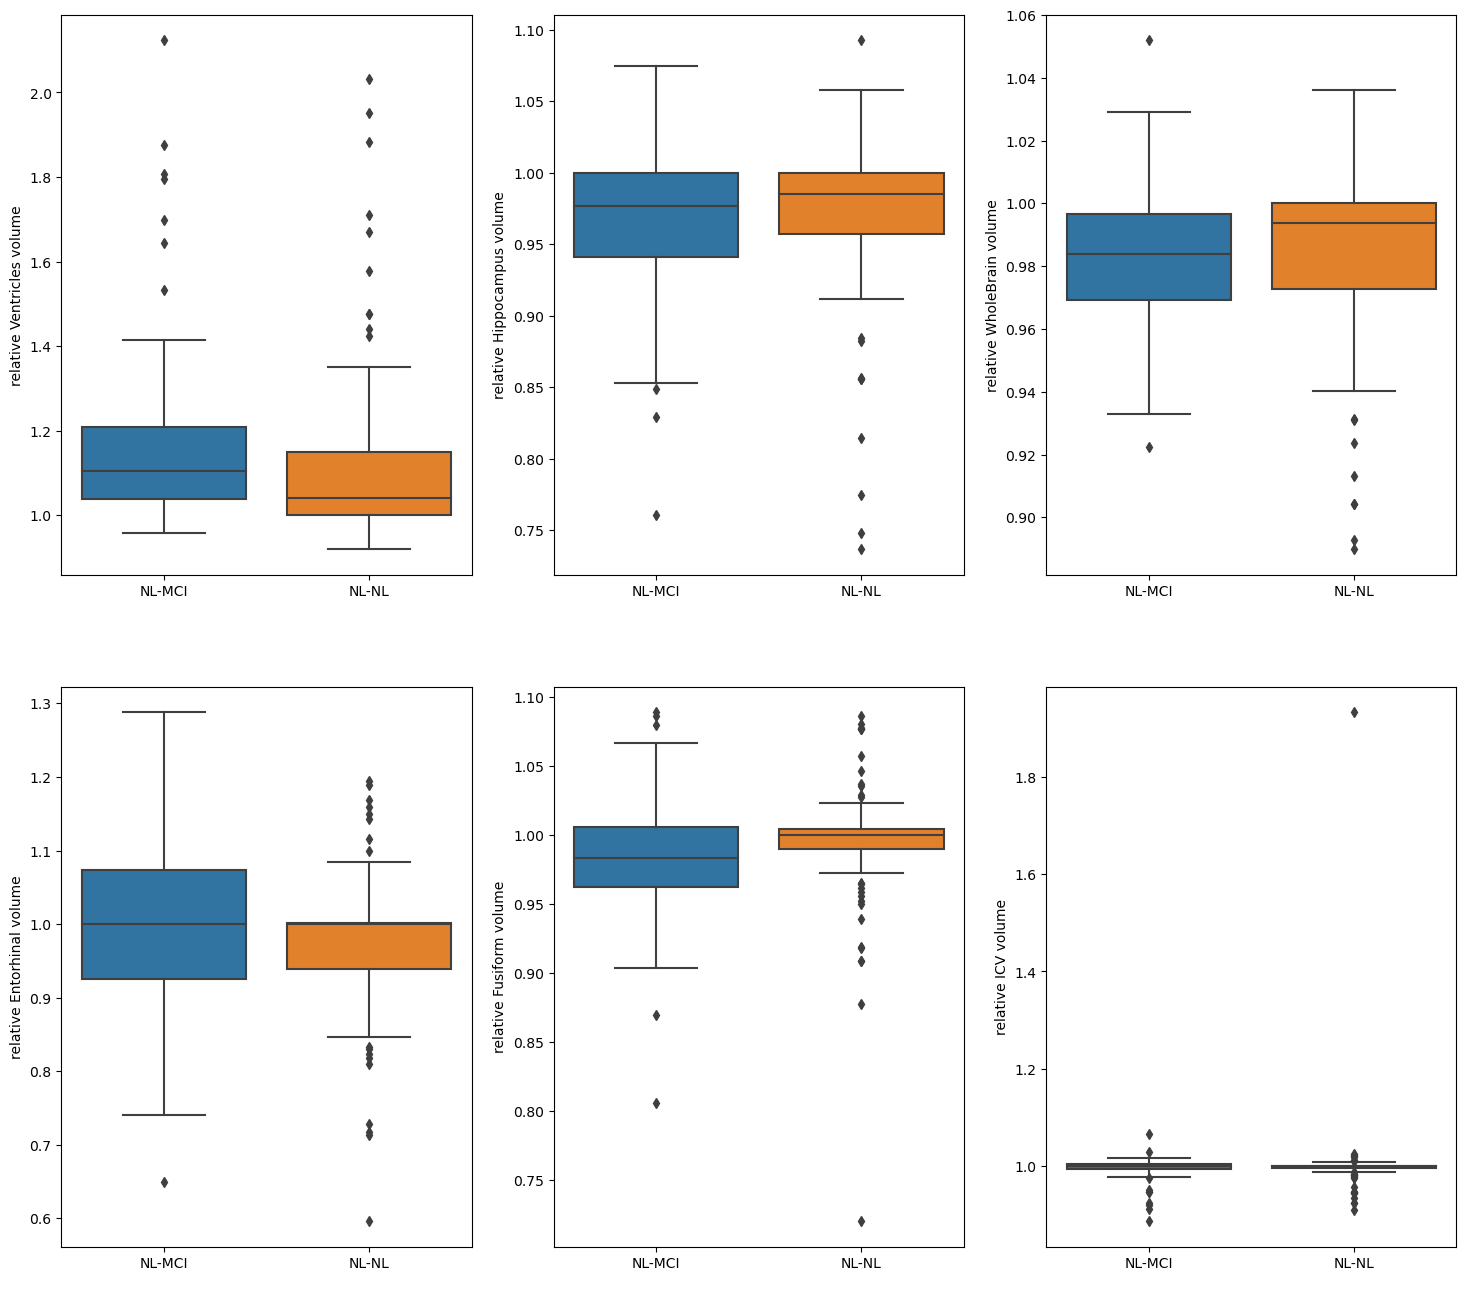

In [39]:
# 10trees. average weighted f1-score of 10-cross validation:0.609
n = 10
res = usampling_scale_data(g1,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,k,title_label)
plt.suptitle('Target: NL-MCI 87; NL-NL 87')
plt.xlabel('relative brain volume',fontsize = 22)
plt.ylabel('Importance',fontsize = 22)
plt.xticks(fontsize=22, rotation=30)
plt.xticks([1, 2,3,4,5,6], ['Ventricles', 'Entorhinal', 'Fusiform','Wholebrain','Hippocampus','ICV'],rotation=20) 
plt.yticks(fontsize=18, rotation=30)

# plot the diagnosis distribution 
df_new = X.copy()
df_new[target] = y
f,axes = plt.subplots(nrows = len(lst)//3,ncols=3,figsize=(18,16))
axes = axes.ravel()

for i in range(len(lst)):
    ax = sns.boxplot(data=df_new, y=lst[i],x= target,ax = axes[i])
    ax.set(xlabel='  ')


In [21]:
cv_models(g2_better,drop_lst,target,k)

After undersampling data size is 148 ; Resampled dataset shape Counter({'MCI-MCIAD': 74, 'MCI-NL': 74})

3 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.330
          - saga_L1, average weighted f1-score of 10-cross validation:0.326
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.330
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.324
          - saga_L1, average weighted f1-score of 10-cross validation:0.341
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.324
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.453
          - saga_L1, average weighted f1-score of 10-cross validation:0.334
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.453
       - C = 1
          

          - 25trees. average weighted f1-score of 10-cross validation:0.616
          - 30trees. average weighted f1-score of 10-cross validation:0.617
          - 35trees. average weighted f1-score of 10-cross validation:0.596
          - 40trees. average weighted f1-score of 10-cross validation:0.593
          - 45trees. average weighted f1-score of 10-cross validation:0.599
          - 50trees. average weighted f1-score of 10-cross validation:0.606
          - 55trees. average weighted f1-score of 10-cross validation:0.608
          - 60trees. average weighted f1-score of 10-cross validation:0.609
          - 65trees. average weighted f1-score of 10-cross validation:0.604
          - 70trees. average weighted f1-score of 10-cross validation:0.611
          - 75trees. average weighted f1-score of 10-cross validation:0.602
          - 80trees. average weighted f1-score of 10-cross validation:0.594
          - 85trees. average weighted f1-score of 10-cross validation:0.594
          - 

After undersampling data size is 148 ; Resampled dataset shape Counter({'MCI-MCIAD': 74, 'MCI-NL': 74})

3 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


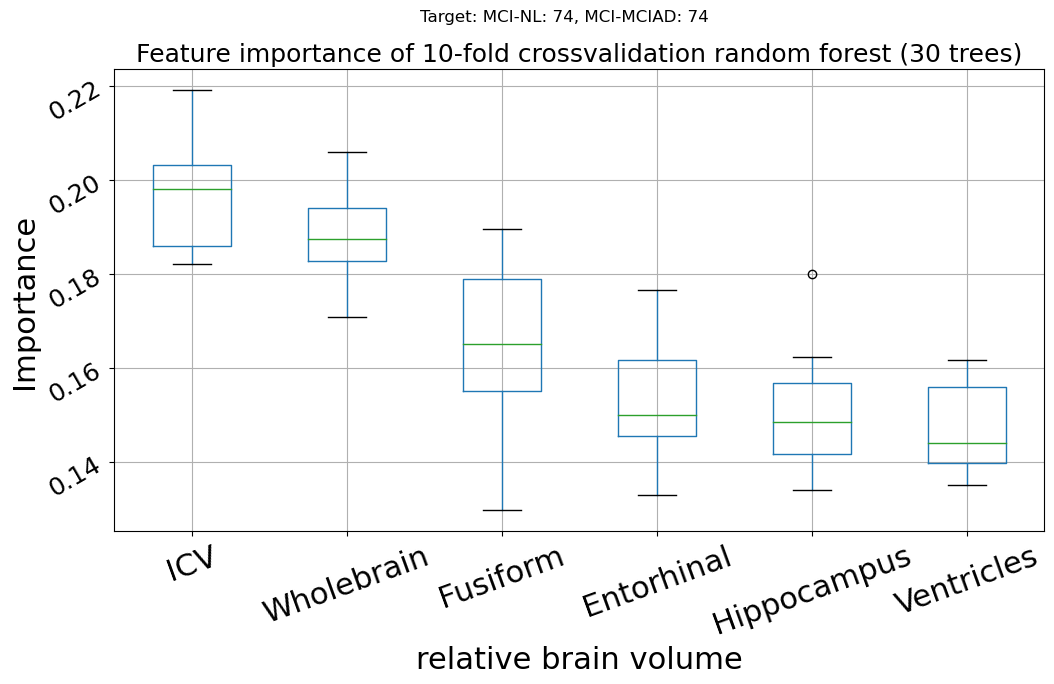

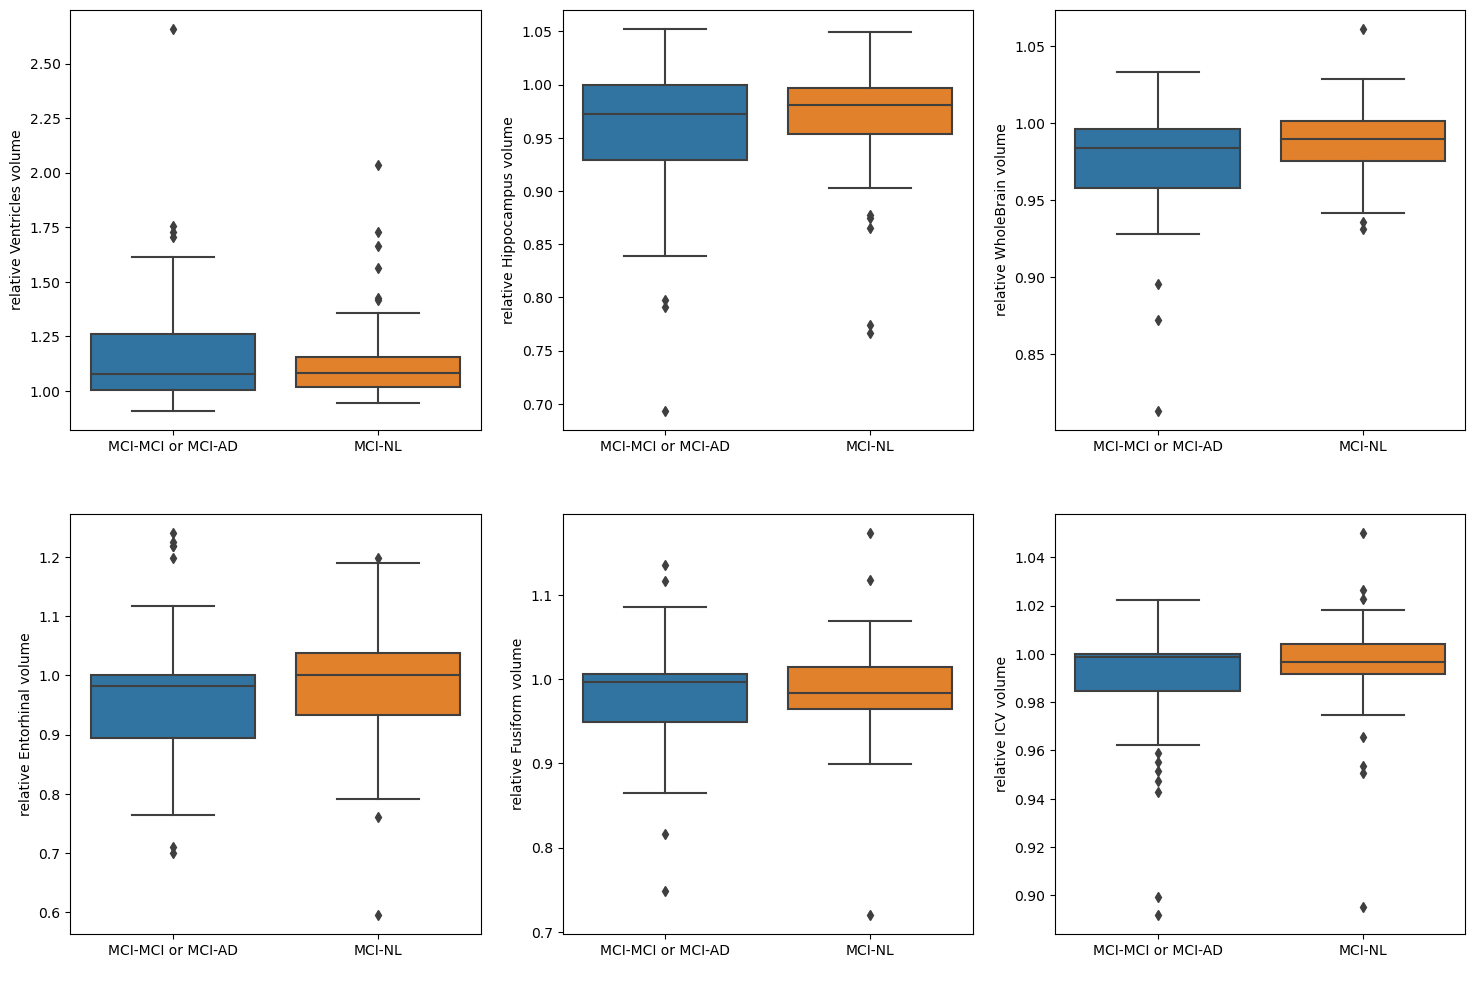

In [35]:
# 30trees. average weighted f1-score of 10-cross validation:0.617
n = 30
res = usampling_scale_data(g2_better,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,k,title_label)
plt.suptitle('Target: MCI-NL: 74, MCI-MCIAD: 74')
plt.xlabel('relative brain volume',fontsize = 22)
plt.ylabel('Importance',fontsize = 22)
plt.xticks(fontsize=22, rotation=30)
plt.xticks([1, 2,3,4,5,6], ['ICV','Wholebrain', 'Fusiform', 'Entorhinal','Hippocampus','Ventricles'],rotation=20) 
plt.yticks(fontsize=18, rotation=30)
# plot the diagnosis distribution 
df_new = X.copy()
df_new[target] = y
f,axes = plt.subplots(nrows = len(lst)//3,ncols=3,figsize=((18,12)))
axes = axes.ravel()
for i in range(len(lst)):
    ax = sns.boxplot(data=df_new, y=lst[i],x= target,ax = axes[i])
    ax.set_xticklabels(['MCI-MCI or MCI-AD','MCI-NL'])
    ax.set(xlabel=' ')

In [23]:
cv_models(g2_worse,drop_lst,target,k)

After undersampling data size is 430 ; Resampled dataset shape Counter({'MCI-AD': 215, 'MCI-NLMCI': 215})

4 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.333
          - saga_L1, average weighted f1-score of 10-cross validation:0.333
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.333
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.707
          - saga_L1, average weighted f1-score of 10-cross validation:0.336
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.707
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.712
          - saga_L1, average weighted f1-score of 10-cross validation:0.320
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.712
       - C = 1
        

          - 25trees. average weighted f1-score of 10-cross validation:0.781
          - 30trees. average weighted f1-score of 10-cross validation:0.793
          - 35trees. average weighted f1-score of 10-cross validation:0.798
          - 40trees. average weighted f1-score of 10-cross validation:0.784
          - 45trees. average weighted f1-score of 10-cross validation:0.794
          - 50trees. average weighted f1-score of 10-cross validation:0.786
          - 55trees. average weighted f1-score of 10-cross validation:0.789
          - 60trees. average weighted f1-score of 10-cross validation:0.791
          - 65trees. average weighted f1-score of 10-cross validation:0.789
          - 70trees. average weighted f1-score of 10-cross validation:0.789
          - 75trees. average weighted f1-score of 10-cross validation:0.798
          - 80trees. average weighted f1-score of 10-cross validation:0.791
          - 85trees. average weighted f1-score of 10-cross validation:0.793
          - 

After undersampling data size is 430 ; Resampled dataset shape Counter({'MCI-AD': 215, 'MCI-NLMCI': 215})

4 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


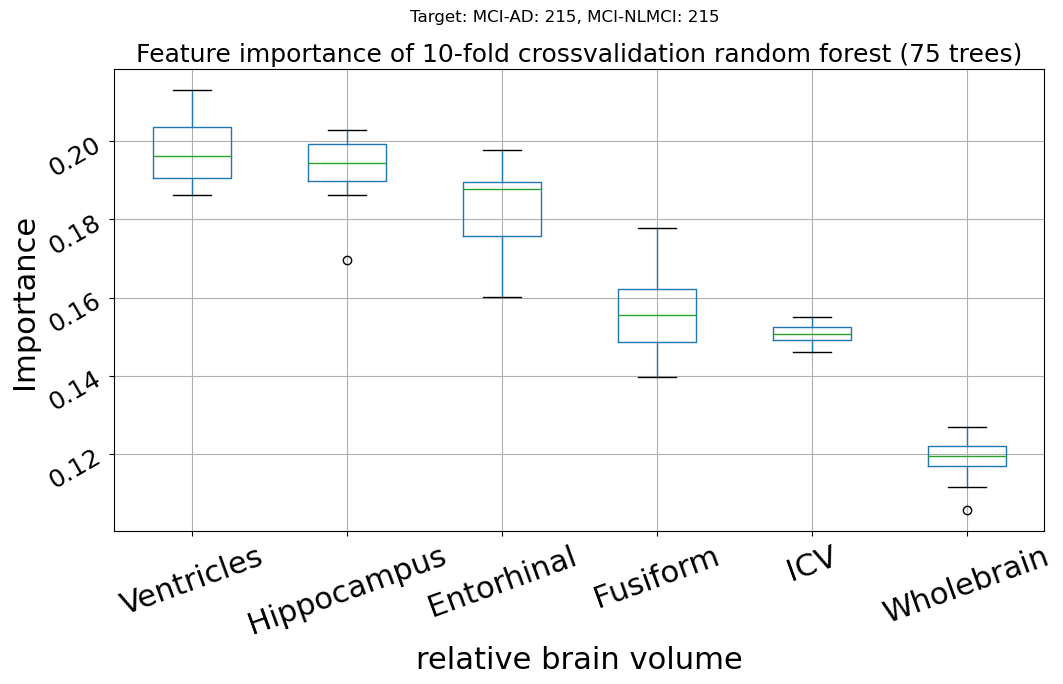

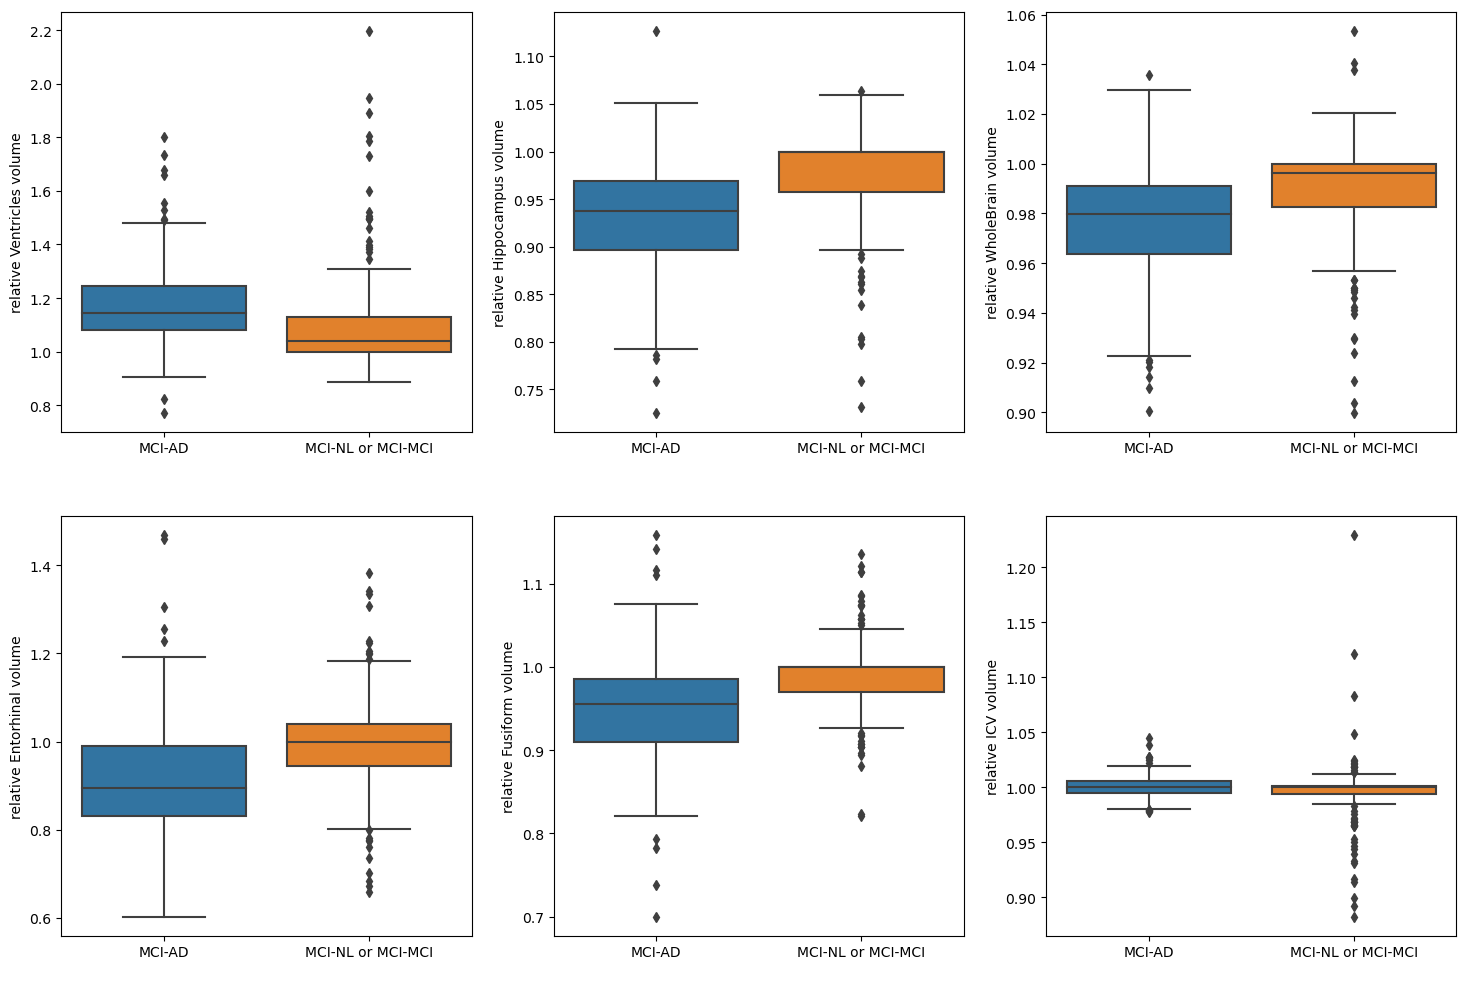

In [31]:
# 75trees. average weighted f1-score of 10-cross validation:0.798

n = 75
res = usampling_scale_data(g2_worse,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,k,title_label)
plt.suptitle('Target: MCI-AD: 215, MCI-NLMCI: 215')
plt.xlabel('relative brain volume',fontsize = 22)
plt.ylabel('Importance',fontsize = 22)
plt.xticks(fontsize=22, rotation=30)
plt.xticks([1, 2,3,4,5,6], ['Ventricles','Hippocampus','Entorhinal','Fusiform','ICV','Wholebrain'],rotation=20) 
plt.yticks(fontsize=18, rotation=30)

# plot the diagnosis distribution 
df_new = X.copy()
df_new[target] = y
f,axes = plt.subplots(nrows = len(lst)//3,ncols=3,figsize=(18,12))
axes = axes.ravel()


for i in range(len(lst)):
    ax = sns.boxplot(data=df_new, y=lst[i],x= target,ax = axes[i])
    ax.set_xticklabels(['MCI-AD','MCI-NL or MCI-MCI'])
    ax.set(xlabel=' ')
    

### keep this one: is a patient with MCI getting better or not

In [25]:
cv_models(g3_better,drop_lst,target,k)

After undersampling data size is 68 ; Resampled dataset shape Counter({'AD-AD': 34, 'AD-NLMCI': 34})

3 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.302
          - saga_L1, average weighted f1-score of 10-cross validation:0.367
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.302
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.327
          - saga_L1, average weighted f1-score of 10-cross validation:0.352
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.327
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.508
          - saga_L1, average weighted f1-score of 10-cross validation:0.304
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.508
       - C = 1
          - l

          - 25trees. average weighted f1-score of 10-cross validation:0.677
          - 30trees. average weighted f1-score of 10-cross validation:0.646
          - 35trees. average weighted f1-score of 10-cross validation:0.663
          - 40trees. average weighted f1-score of 10-cross validation:0.632
          - 45trees. average weighted f1-score of 10-cross validation:0.650
          - 50trees. average weighted f1-score of 10-cross validation:0.650
          - 55trees. average weighted f1-score of 10-cross validation:0.650
          - 60trees. average weighted f1-score of 10-cross validation:0.617
          - 65trees. average weighted f1-score of 10-cross validation:0.632
          - 70trees. average weighted f1-score of 10-cross validation:0.632
          - 75trees. average weighted f1-score of 10-cross validation:0.662
          - 80trees. average weighted f1-score of 10-cross validation:0.647
          - 85trees. average weighted f1-score of 10-cross validation:0.632
          - 

After undersampling data size is 68 ; Resampled dataset shape Counter({'AD-AD': 34, 'AD-NLMCI': 34})

3 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


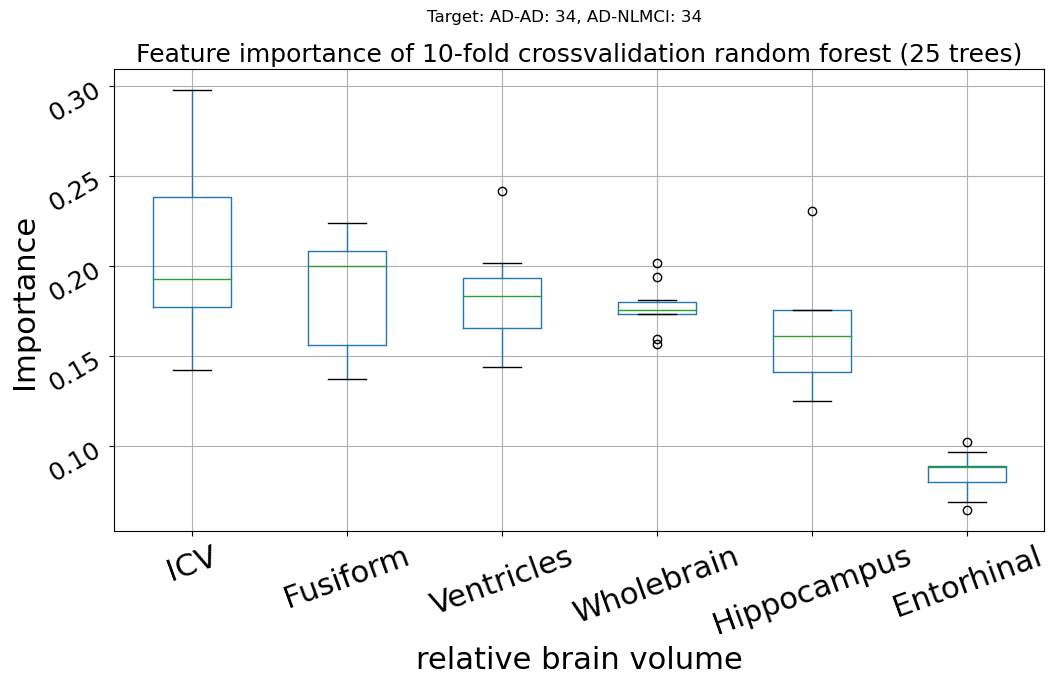

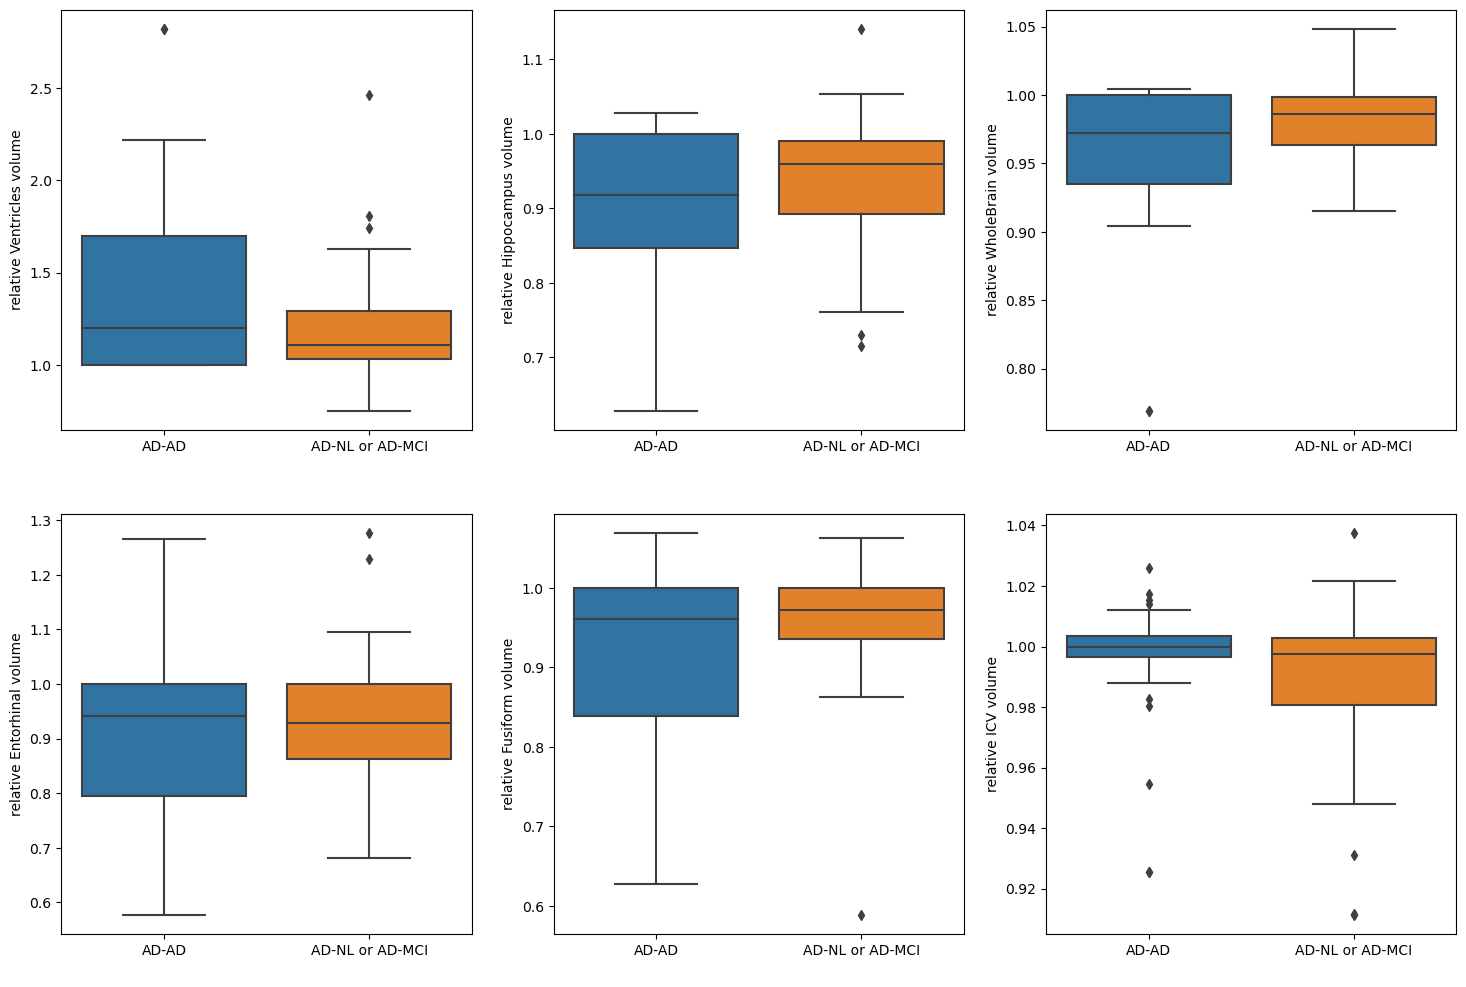

In [33]:
# 25trees. average weighted f1-score of 10-cross validation:0.677
n = 25
res = usampling_scale_data(g3_better,drop_lst,target)     
X = res[0]  # unscaled input
y = res[3]
clf = RandomForestClassifier(n_estimators =n, random_state = 5862)
title_label = '{}-fold crossvalidation random forest ({} trees)'.format(k,n)
feature_importance(X,y,clf,k,title_label)
plt.suptitle('Target: AD-AD: 34, AD-NLMCI: 34')
plt.xlabel('relative brain volume',fontsize = 22)
plt.ylabel('Importance',fontsize = 22)
plt.xticks(fontsize=22, rotation=30)
plt.xticks([1, 2,3,4,5,6], ['ICV','Fusiform','Ventricles','Wholebrain','Hippocampus','Entorhinal'],rotation=20) 
plt.yticks(fontsize=18, rotation=30)

# plot the diagnosis distribution 
df_new = X.copy()
df_new[target] = y
f,axes = plt.subplots(nrows = len(lst)//3,ncols=3,figsize=(18,12))
axes = axes.ravel()

for i in range(len(lst)):
    ax = sns.boxplot(data=df_new, y=lst[i],x= target,ax = axes[i])
    ax.set_xticklabels(['AD-AD','AD-NL or AD-MCI'])
    ax.set(xlabel='Diagnosis changes')
    ax.set(xlabel=' ')